In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scp
import math

In [2]:
sp = pd.read_csv('s&p500_historical.csv',header=0)

In [3]:
annualreturn = sp.iloc[:,1]
date = sp.iloc[:,0]

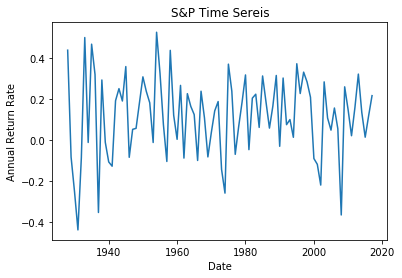

In [4]:
#part 1
#a
#plot annual return data as time series 
plt.plot(date,annualreturn)
plt.title('S&P Time Sereis')
plt.xlabel('Date')
plt.ylabel('Annual Return Rate')
plt.show()


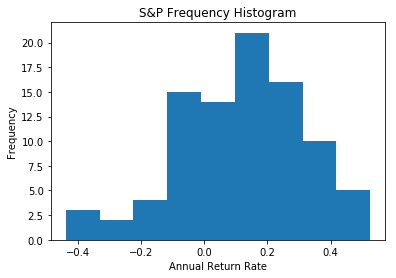

In [5]:
#b
#plot the annual return data as histogram
plt.hist(annualreturn, bins = 'auto')
plt.title('S&P Frequency Histogram')
plt.xlabel('Annual Return Rate')
plt.ylabel('Frequency')
plt.show()

In [6]:
#c
#descriptive statistics summary
annualreturn.describe()

count    90.000000
mean      0.115300
std       0.196214
min      -0.438400
25%      -0.011675
50%       0.138700
75%       0.247525
max       0.525600
Name: S&P 500, dtype: float64

In [7]:
scp.anderson(annualreturn,'norm')

AndersonResult(statistic=0.4155418133023687, critical_values=array([0.553, 0.63 , 0.756, 0.882, 1.049]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [8]:
#part 2
#final retirement savings function define
#starting investment = y
#annual return rate = r
#annual investment = p
#years = n

def final_retirement_savings(y,r,p,n):
    final_amount = y*(math.pow((1+r),n))+(p*(math.pow((1+r),n)-1)/r)*(1+r)
    return final_amount

In [9]:
#a calculate the final retirement savings by given numbers
final_retirement_savings(5000,np.mean(annualreturn),2000,40)

1895335.9922268935

In [10]:
#b
#2d table of varing time and annual investment
#n = 20,25,30,35,40
#p = 100, 1000, 2000, 3000, 4000
output = []
for n in [20,25,30,35,40]: #consider n first
    for p in [100, 1000, 2000, 3000, 4000]: #for one n value, output the savings for each p 
        frs = round(final_retirement_savings(5000,np.mean(annualreturn),p,n),1)
        output.append(frs)
output = np.array(output)

table = pd.DataFrame(output.reshape((5,5))) #append the dataframe by 5x5 format
table.columns = ['p=100','p=1000','p=2000','p=3000','p=4000'] #change the column namae to present the p value
df = pd.DataFrame(['n=20','n=25','n=30','n=35','n=40']) #add a row to present the n value
table.insert(loc=0,column = ' ',value = df)
table

,,p=100,p=1000,p=2000,p=3000,p=4000
0,n=20,51951.8,120449.9,196558.9,272667.9,348777.0
1,n=25,90353.7,214876.6,353235.3,491594.1,629952.8
2,n=30,156622.9,377826.1,623607.6,869389.0,1115170.4
3,n=35,270981.8,659023.8,1090181.7,1521339.5,1952497.3
4,n=40,468327.9,1144279.1,1895336.0,2646392.9,3397449.7


In [11]:
#b-cont
#rate of return analysis
output_rr = []

for n in [20,25,30,35,40]: #consider n first
    for p in [100, 1000, 2000, 3000, 4000]:
        frs = round(final_retirement_savings(5000,np.mean(annualreturn),p,n),1)
        rr = ((frs - (n*p))/(n*p))*100 #rate of investment return
        output_rr.append(rr)
output_rr = np.array(output_rr).round(2)
table = pd.DataFrame(output_rr.reshape((5,5))) #append the dataframe by 5x5 format
table.columns = ['p=100','p=1000','p=2000','p=3000','p=4000'] #change the column namae to present the p value
df = pd.DataFrame(['n=20','n=25','n=30','n=35','n=40']) #add a row to present the n value
table.insert(loc=0,column = ' ',value = df)
print('        rate of investment return(%)')
table

        rate of investment return(%)


,,p=100,p=1000,p=2000,p=3000,p=4000
0,n=20,2497.59,502.25,391.40,354.45,335.97
1,n=25,3514.15,759.51,606.47,555.46,529.95
2,n=30,5120.76,1159.42,939.35,865.99,829.31
3,n=35,7642.34,1782.93,1457.40,1348.89,1294.64
4,n=40,11608.20,2760.70,2269.17,2105.33,2023.41


In [12]:
#c
#n = 25; frs = 200000; p=?
#use if statement to select the satisfied values
for p in range(20000): 
    frs = round(final_retirement_savings(5000,np.mean(annualreturn),p,25),2)
    if frs > 2000000:
       print ('When your annual investment is $', p ,', your final retirement savings will acheive $',frs,'after 25 years.')
       break 

When your annual investment is $ 13903 , your final retirement savings will acheive $ 2000119.51 after 25 years.


In [15]:
#part 3
#a
#annual investment = p = 13903
#year = t = 25
#start investment = y = $5000
#annual return rate = r 

#define the yt function
output_rt = []
output_yt = []
def simulation (num):
    #mote carlo simulation of rt
    for i in range(num):
        #inverse of the cdf 
        #ddof=1 for sample deviation
        rt = scp.norm.ppf(np.random.random(25),np.mean(annualreturn),np.std(annualreturn, ddof=1))
        rt = rt.round(4)
        output_rt.append(rt[-1])
        #calculate yt
        yt = 5000
        for j in range(25):
            yt = (yt + 13903) * (1 + rt[j])
        output_yt.append(yt)
        output = pd.DataFrame({'Final Rt':output_rt,'Final Retirement Savings':output_yt}).astype('float64')
    return output

In [16]:
#b
#run 400 simulations of the final retirement savings
simulation_400 = simulation(400)
simulation_400

,Final Rt,Final Retirement Savings
0,-0.1822,1.328959e+06
1,0.1129,3.263850e+06
2,0.2539,1.031024e+06
3,0.0768,1.322276e+06
4,0.2911,4.632272e+05
5,0.3943,3.567094e+06
6,0.2706,5.855654e+05
7,0.1987,1.575058e+06
8,0.1213,2.828152e+06
9,0.4577,1.357563e+06


In [42]:
#name the yt seperatly
final_retirement_savings = (simulation_400.iloc[:,1]).astype(int) #conver the type to integer

In [55]:
#c
#mean,std,skewness,minimum and maximum
print ('mean: ', np.mean(final_retirement_savings))
print ('standard deviation: ', np.std(final_retirement_savings))
print ('skewness: ', scp.skew(final_retirement_savings))
print ('minimum: ', np.min(final_retirement_savings))
print ('maximum: ', np.max(final_retirement_savings))

mean:  2074695.9975
standard deviation:  1741532.0475426135
skewness:  2.517191758760709
minimum:  210174
maximum:  13536067


In [56]:
#d
#for what percent of your simulations did you save at least $2,000,000?
count = 0
for i in range(400):
    if final_retirement_savings[i] > 2000000:
        count = count + 1
        
percentage = (count/400)*100
print ('There are %.2f' % percentage,'% of the final retirement saving simulations higher than $2,000,000')

There are 37.25 % of the final retirement saving simulations higher than $2,000,000


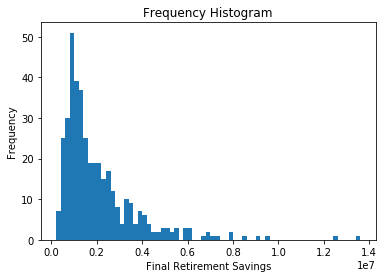

In [60]:
#e
#frequency histogram
#bins of width $200,000

plt.hist(final_retirement_savings, 
         bins=range(min(final_retirement_savings), max(final_retirement_savings) + 200000, 200000))
plt.title('Frequency Histogram')
plt.xlabel('Final Retirement Savings')
plt.ylabel('Frequency')

plt.show()

In [63]:
#f
#goodness of fit test
scp.anderson(final_retirement_savings,'expon')

AndersonResult(statistic=19.874394304979887, critical_values=array([0.921, 1.076, 1.339, 1.604, 1.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))